In [1]:
import re
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
get_ipython().magic('matplotlib inline')

In [2]:
train = pd.read_csv("train_file.csv")
train = train.drop(['IDLink', 'Source', 'PublishDate', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn'], axis=1)
train.head()

,Title,Headline,SentimentTitle,SentimentHeadline
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor,0.000000,-0.053300
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.",0.208333,-0.156386
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions",-0.425210,0.139754
3,Finland GDP Expands In Q4,"Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday.",0.000000,0.026064
4,"Tourism, govt spending buoys Thai economy in January","Tourism and public spending continued to boost the economy in January, in light of contraction in private consumption and exports, according to the Bank of Thailand data.",0.000000,0.141084


In [3]:
test = pd.read_csv("test_file.csv")
test = test.drop(['Source', 'PublishDate', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn'], axis=1)
test.head()

,IDLink,Title,Headline
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA funds,"With the 2016 budget now passed by the National Assembly and a N3trillion war chest, the government of President Muhammadu Buhari says"
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant family members ...,A recent Microsoft Research video shows how the $3000 augmented reality system can be used to transmit 3D models of people anywhere in
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trump & Recites Racism","* Microsoft teamed with Bing to create TayTweets, an account for a robot that was designed to learn about “conversational understanding,” by having automated discussions with Twitter users, and mi..."
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Economy Out of Rut,Central bankers have managed to steer the world economy clear of a recession while leaving it stuck in the same rut that led to its troubles in the first place.
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy outlook,"However, this streak of seven-day gains might end here as markets take a step back and ponder in respect of the US economy and its inflation"


In [4]:
train.shape, test.shape

((55932, 4), (37288, 3))

In [5]:
length_train = train['Title'].str.len()
length_test = test['Title'].str.len()

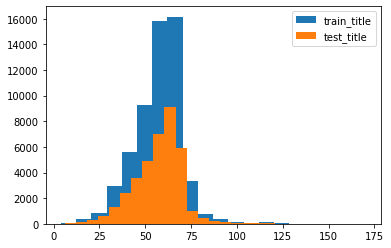

In [6]:
plt.hist(length_train, bins=20, label="train_title")
plt.hist(length_test, bins=20, label="test_title")
plt.legend()
plt.show()

In [7]:
length_train = train['Headline'].str.len()
length_test = test['Headline'].str.len()

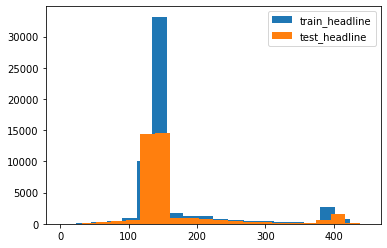

In [8]:
plt.hist(length_train, bins=20, label="train_headline")
plt.hist(length_test, bins=20, label="test_headline")
plt.legend()
plt.show()

In [9]:
from textblob import Word
stop_words = set(stopwords.words('english'))
result = []
title = pd.DataFrame()
for s in train['Title'].values:
    tokens = word_tokenize(s)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stemmed = [Word(word).lemmatize() for word in words]
    result.append([i for i in stemmed if not i in stop_words])
title['result'] = result
title = pd.DataFrame(title)
title.head()

,result
0,"[obama, lay, wreath, arlington, national, cemetery]"
1,"[look, health, chinese, economy]"
2,"[nouriel, roubini, global, economy, back]"
3,"[finland, gdp, expands]"
4,"[tourism, govt, spending, buoy, thai, economy, january]"


In [10]:
stop_words = set(stopwords.words('english'))
result1 = []
headline = pd.DataFrame()
for s in train['Headline'].values:
    tokens = word_tokenize(s)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stemmed = [Word(word).lemmatize() for word in words]
    result1.append([i for i in stemmed if not i in stop_words])
headline['result'] = result1
headline = pd.DataFrame(headline)
headline.head()

,result
0,"[obama, lay, wreath, arlington, national, cemetery, president, barack, obama, ha, laid, wreath, tomb, unknown, honor]"
1,"[tim, haywood, investment, director, businessunit, head, fixed, income, gam, discus, china, beige, book, state, economy]"
2,"[nouriel, roubini, nyu, professor, chairman, roubini, global, economics, explains, global, economy, nt, facing, condition]"
3,"[finland, economy, expanded, marginally, three, month, ended, december, contracting, previous, quarter, preliminary, figure, statistic, finland, showed, monday]"
4,"[tourism, public, spending, continued, boost, economy, january, light, contraction, private, consumption, export, according, bank, thailand, data]"


In [11]:
for i in range(len(title['result'])):
    title['result'][i] = TreebankWordDetokenizer().detokenize(title['result'][i])
title['result'] = title
title.head()

,result
0,obama lay wreath arlington national cemetery
1,look health chinese economy
2,nouriel roubini global economy back
3,finland gdp expands
4,tourism govt spending buoy thai economy january


In [12]:
for i in range(len(headline['result'])):
    headline['result'][i] = TreebankWordDetokenizer().detokenize(headline['result'][i])
headline['result'] = headline
headline.head()

,result
0,obama lay wreath arlington national cemetery president barack obama ha laid wreath tomb unknown honor
1,tim haywood investment director businessunit head fixed income gam discus china beige book state economy
2,nouriel roubini nyu professor chairman roubini global economics explains global economy nt facing condition
3,finland economy expanded marginally three month ended december contracting previous quarter preliminary figure statistic finland showed monday
4,tourism public spending continued boost economy january light contraction private consumption export according bank thailand data


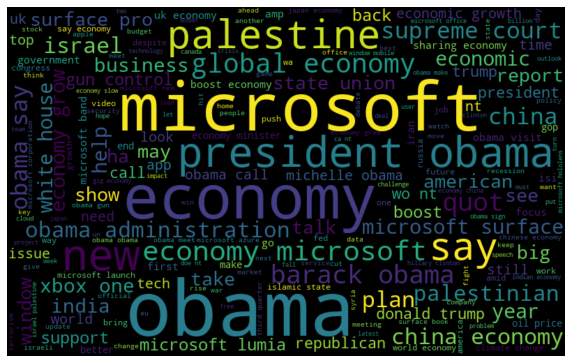

In [13]:
all_words = ' '.join([text for text in title['result']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

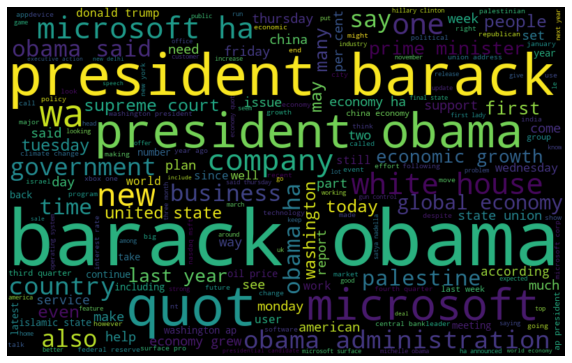

In [14]:
all_words = ' '.join([text for text in headline['result']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [16]:
#Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(title['result'])
bow.shape

(55932, 1000)

In [17]:
#Bag-of-Words Features
bow_vectorizer1 = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow1 = bow_vectorizer1.fit_transform(headline['result'])
bow1.shape

(55932, 1000)

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [19]:
#Bagofwords features
train_bow = bow[:55932,:]
test_bow = bow[55932:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['SentimentTitle'],
                                                          random_state=42,
                                                          test_size=0.2)

In [20]:
#Bagofwords features
train_bow1 = bow1[:55932,:]
test_bow1 = bow1[55932:,:]
# splitting data into training and validation set
xtrain_bow1, xvalid_bow1, ytrain1, yvalid1 = train_test_split(train_bow1, train['SentimentHeadline'],
                                                          random_state=42,
                                                          test_size=0.2)

In [21]:
model = xgb.XGBRegressor()
xgb_model = model.fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)

In [22]:
xgb_model1 = model.fit(xtrain_bow1, ytrain1)
prediction1 = xgb_model1.predict(xvalid_bow1)

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yvalid, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(yvalid, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yvalid, prediction)))

Mean Absolute Error: 0.08632066422221994
Mean Squared Error: 0.014506422673695948
Root Mean Squared Error: 0.12044261153634933


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yvalid1, prediction1))
print('Mean Squared Error:', metrics.mean_squared_error(yvalid1, prediction1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yvalid1, prediction1)))

Mean Absolute Error: 0.09962851514846471
Mean Squared Error: 0.01684235566095453
Root Mean Squared Error: 0.12977810162332676


In [25]:
stop_words = set(stopwords.words('english'))
result = []
title = pd.DataFrame()
for s in test['Title'].values:
    tokens = word_tokenize(s)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stemmed = [Word(word).lemmatize() for word in words]
    result.append([i for i in stemmed if not i in stop_words])
title['result'] = result
title = pd.DataFrame(title)
title.head()

,result
0,"[sliding, economy, fg, fight, back, tsa, fund]"
1,"[microsoft, show, hololens, bring, distant, family, member]"
2,"[microsoft, twitter, robot, praise, hitler, trump, recites, racism]"
3,"[flood, central, bank, move, ca, nt, get, world, economy, rut]"
4,"[usdjpy, bear, lining, mixed, u, economy, outlook]"


In [26]:
stop_words = set(stopwords.words('english'))
result = []
headline = pd.DataFrame()
for s in test['Headline'].values:
    tokens = word_tokenize(s)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stemmed = [Word(word).lemmatize() for word in words]
    result.append([i for i in stemmed if not i in stop_words])
headline['result'] = result
headline = pd.DataFrame(headline)
headline.head()

,result
0,"[budget, passed, national, assembly, war, chest, government, president, muhammadu, buhari, say]"
1,"[recent, microsoft, research, video, show, augmented, reality, system, used, transmit, model, people, anywhere]"
2,"[microsoft, teamed, bing, create, taytweets, account, robot, wa, designed, learn, conversational, understanding, automated, discussion, twitter, user, mimicking, language, use, taytweets, started,..."
3,"[central, banker, managed, steer, world, economy, clear, recession, leaving, stuck, rut, led, trouble, first, place]"
4,"[however, streak, sevenday, gain, might, end, market, take, step, back, ponder, respect, u, economy, inflation]"


In [27]:
for i in range(len(title['result'])):
    title['result'][i] = TreebankWordDetokenizer().detokenize(title['result'][i])
title['result'] = title
title.head()

,result
0,sliding economy fg fight back tsa fund
1,microsoft show hololens bring distant family member
2,microsoft twitter robot praise hitler trump recites racism
3,flood central bank move ca nt get world economy rut
4,usdjpy bear lining mixed u economy outlook


In [28]:
for i in range(len(headline['result'])):
    headline['result'][i] = TreebankWordDetokenizer().detokenize(headline['result'][i])
headline['result'] = headline
headline.head()

,result
0,budget passed national assembly war chest government president muhammadu buhari say
1,recent microsoft research video show augmented reality system used transmit model people anywhere
2,microsoft teamed bing create taytweets account robot wa designed learn conversational understanding automated discussion twitter user mimicking language use taytweets started harmless le hour bot ...
3,central banker managed steer world economy clear recession leaving stuck rut led trouble first place
4,however streak sevenday gain might end market take step back ponder respect u economy inflation


In [29]:
#Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(title['result'])
bow.shape
test_bow = bow[:37288:,:]

In [30]:
#Bag-of-Words Features
bow_vectorizer1 = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow1 = bow_vectorizer1.fit_transform(headline['result'])
bow1.shape
test_bow1 = bow1[:37288:,:]

In [31]:
test_pred = xgb_model.predict(test_bow)
test_pred1 = xgb_model1.predict(test_bow1)
print(test_pred)
final = pd.DataFrame()
final['IDLink'] = test['IDLink']
final['SentimentTitle'] = test_pred
final['SentimentHeadline'] = test_pred1
final.to_csv('bow.csv', index=False)

[-0.02597278 -0.02597278 -0.07222486 ... -0.04392636 -0.0503844
 -0.02597278]
